### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from scipy import stats
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset
df_raptor_team = pd.read_csv('modern_RAPTOR_by_team.csv')
df_nb_data_history = pd.read_csv('nba_data_historical.csv')

In [3]:
df_raptor_team.head(2)

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,...,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.1987,-3.298178,-6.535113,-9.833292,0.334678
1,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,...,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0000,0.339201,-0.611866,-0.272665,0.325771


In [4]:
row, col = df_raptor_team.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 7289 rows and 23 columns.


In [5]:
df_raptor_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           7289 non-null   object 
 1   player_id             7289 non-null   object 
 2   season                7289 non-null   int64  
 3   season_type           7289 non-null   object 
 4   team                  7289 non-null   object 
 5   poss                  7289 non-null   int64  
 6   mp                    7289 non-null   int64  
 7   raptor_box_offense    7287 non-null   float64
 8   raptor_box_defense    7287 non-null   float64
 9   raptor_box_total      7287 non-null   float64
 10  raptor_onoff_offense  7287 non-null   float64
 11  raptor_onoff_defense  7287 non-null   float64
 12  raptor_onoff_total    7287 non-null   float64
 13  raptor_offense        7289 non-null   float64
 14  raptor_defense        7289 non-null   float64
 15  raptor_total         

In [6]:
df_raptor_team.isna().sum()

player_name             0
player_id               0
season                  0
season_type             0
team                    0
poss                    0
mp                      0
raptor_box_offense      2
raptor_box_defense      2
raptor_box_total        2
raptor_onoff_offense    2
raptor_onoff_defense    2
raptor_onoff_total      2
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               2
war_reg_season          1
war_playoffs            1
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             2
dtype: int64

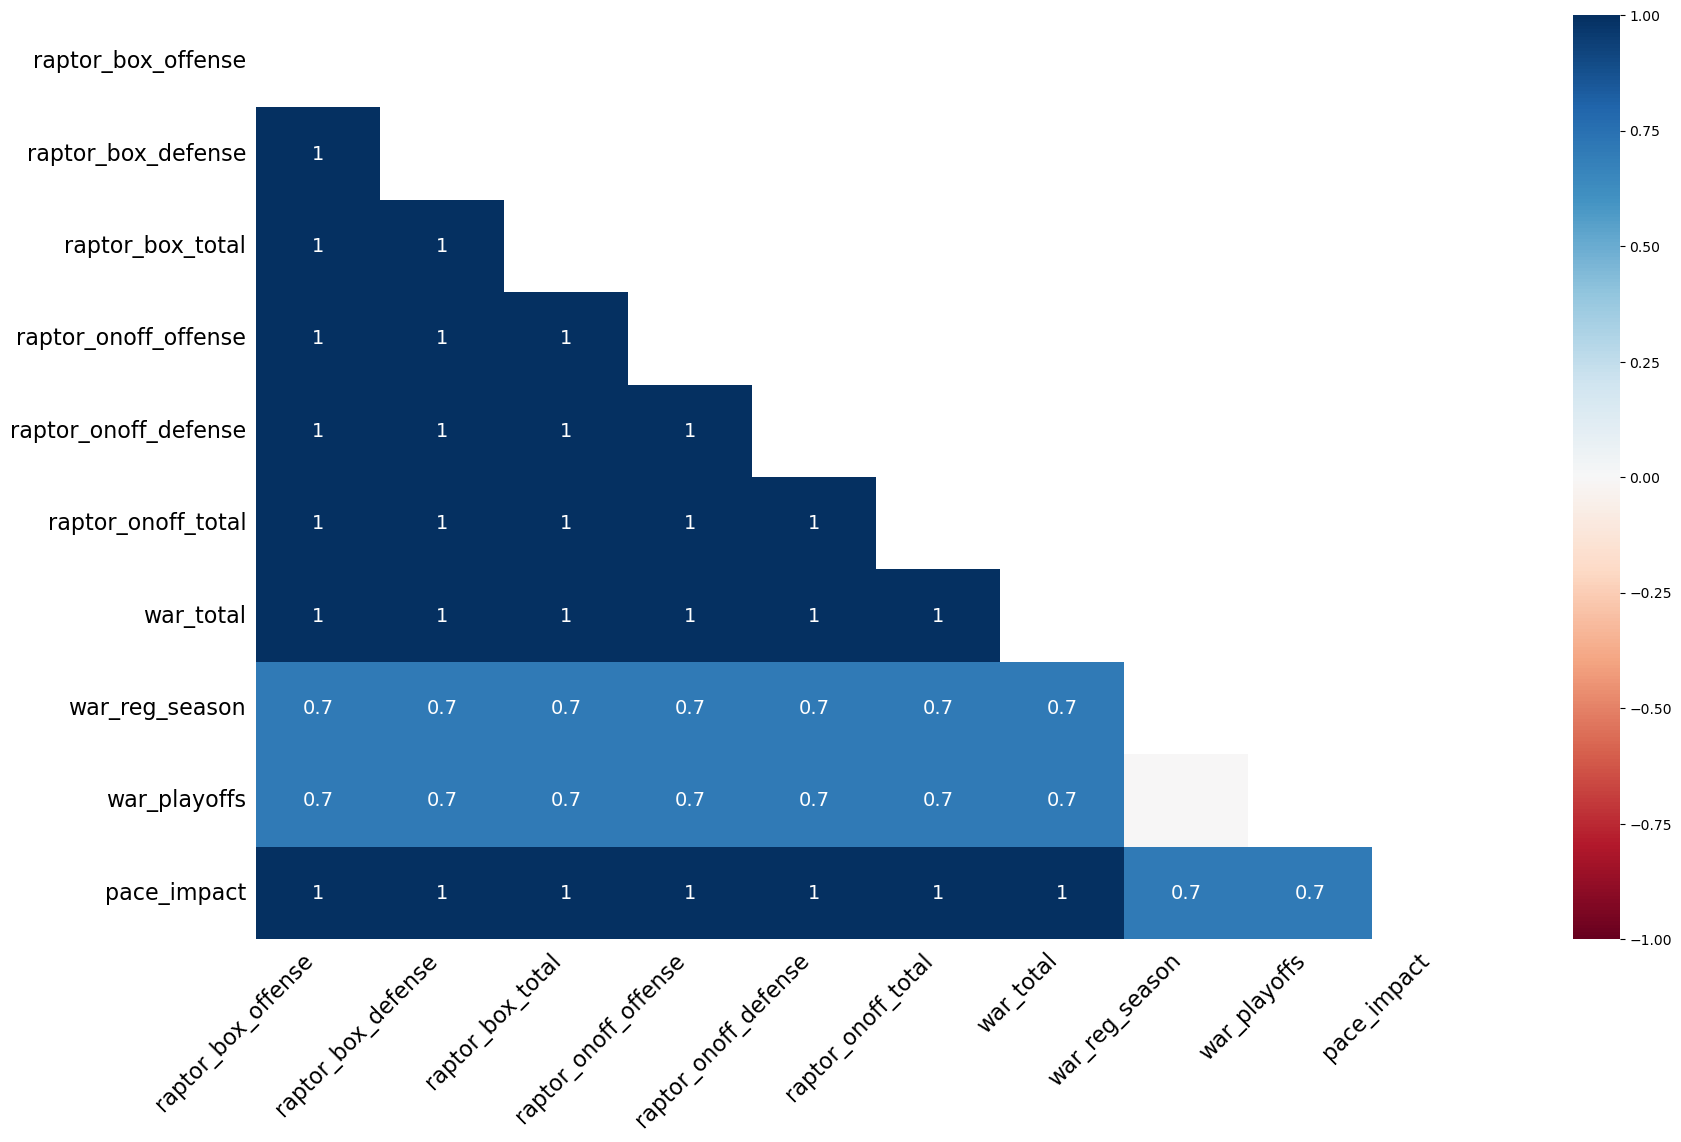

In [7]:
msno.heatmap(df_raptor_team);

In [8]:
df_nb_data_history.head(2)

,player_id,name_common,year_id,type,age,team_id,pos,tmRtg,franch_id,G,...,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Pace +/-
0,youngtr01,Trae Young,2020,RS,21,ATL,PG,NaN,ATL,60,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,45.5,44.8,2.9
1,huntede01,De'Andre Hunter,2020,RS,22,ATL,SF,NaN,ATL,63,...,0.7,NaN,NaN,NaN,NaN,NaN,NaN,44.5,21.1,0.0


In [9]:
row, col = df_nb_data_history.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 28179 rows and 42 columns.


In [10]:
df_nb_data_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    28179 non-null  object 
 1   name_common  28179 non-null  object 
 2   year_id      28179 non-null  int64  
 3   type         28179 non-null  object 
 4   age          28179 non-null  int64  
 5   team_id      28179 non-null  object 
 6   pos          28179 non-null  object 
 7   tmRtg        19489 non-null  float64
 8   franch_id    28179 non-null  object 
 9   G            28179 non-null  int64  
 10  Min          28179 non-null  int64  
 11  MP%          19489 non-null  float64
 12  MPG          28179 non-null  float64
 13  P/36         19489 non-null  float64
 14  TS%          28179 non-null  float64
 15  A/36         19489 non-null  float64
 16  R/36         19489 non-null  float64
 17  SB/36        19489 non-null  float64
 18  TO/36        19489 non-null  float64
 19  Rapt

In [11]:
df_nb_data_history.isna().sum()

player_id         0
name_common       0
year_id           0
type              0
age               0
team_id           0
pos               0
tmRtg          8690
franch_id         0
G                 0
Min               0
MP%            8690
MPG               0
P/36           8690
TS%               0
A/36           8690
R/36           8690
SB/36          8690
TO/36          8690
Raptor O          0
Raptor D          0
Raptor+/-         0
Raptor WAR        2
PIE%           8690
AWS%           8690
USG%              0
AST%              0
TOV%              0
ORB%              0
DRB%              0
TRB%              0
STL%              0
BLK%              0
ORtg           8690
%Pos           8690
DRtg           8690
2P%            8690
3P%            8690
FT%            8690
3PAr              0
FTAr              0
Pace +/-          2
dtype: int64

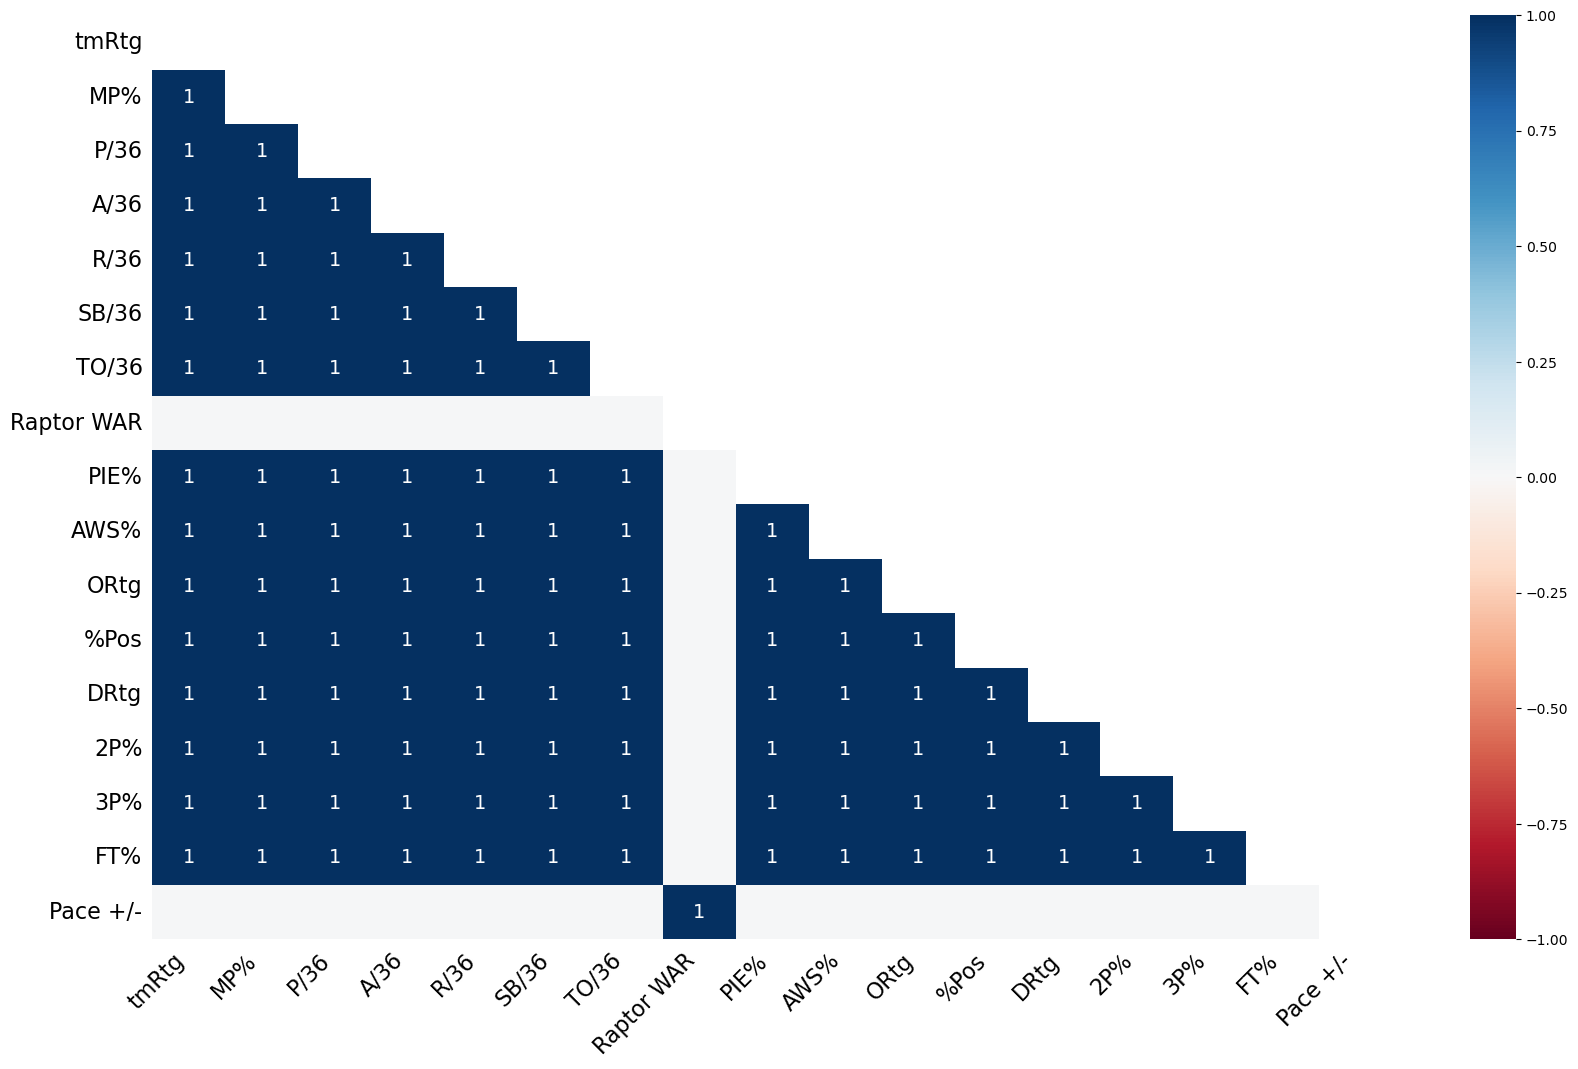

In [12]:
msno.heatmap(df_nb_data_history);

In [13]:
df_nba_elo = pd.read_csv('nbaallelo.csv')

In [14]:
df_nba_elo.head(2)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.29483,NYK,Knicks,68,1300.0,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.70517,TRH,Huskies,66,1300.0,1293.2767,A,W,0.359935,NaN


In [15]:
row, col = df_nba_elo.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 126314 rows and 23 columns.


In [16]:
df_nba_elo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [17]:
df_nba_elo.isna().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

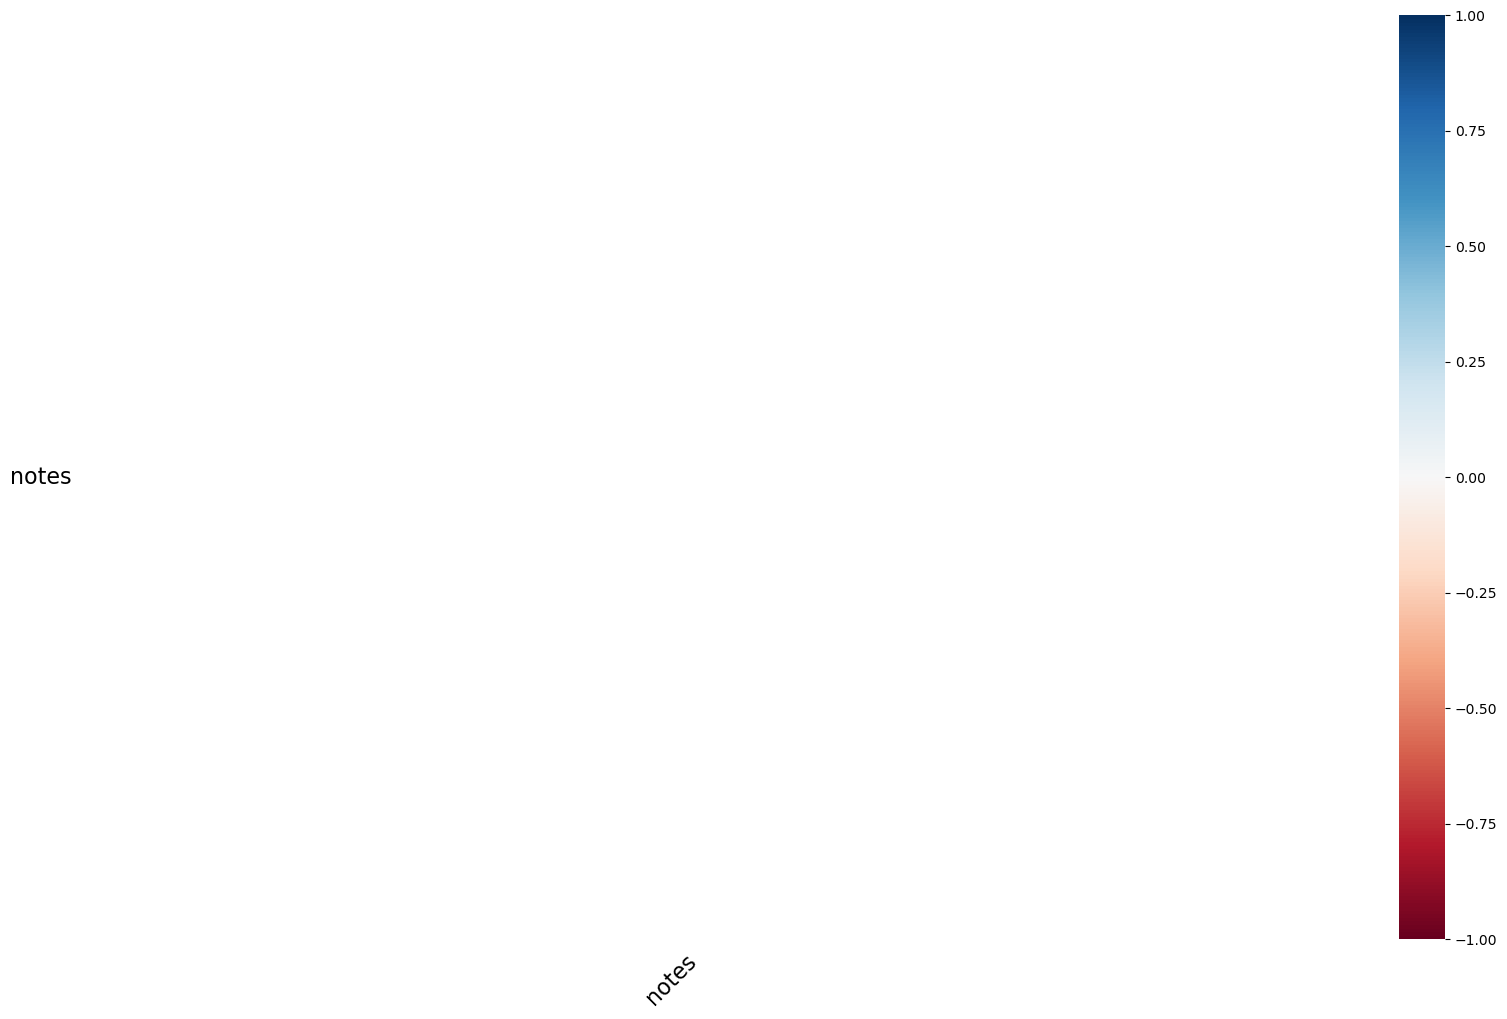

In [18]:
msno.heatmap(df_nba_elo);

In [19]:
    # Preprocess the data if needed (e.g., handling missing values, data type conversions)

# Identify common columns for merging
common_columns = list(set(df_raptor_team.columns) & set(df_nb_data_history.columns))

# Merge the datasets on common columns
combined_data = pd.merge(df_raptor_team, df_nb_data_history, on=common_columns, how='inner')

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79623 entries, 0 to 79622
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           79623 non-null  object 
 1   player_id             79623 non-null  object 
 2   season                79623 non-null  int64  
 3   season_type           79623 non-null  object 
 4   team                  79623 non-null  object 
 5   poss                  79623 non-null  int64  
 6   mp                    79623 non-null  int64  
 7   raptor_box_offense    79592 non-null  float64
 8   raptor_box_defense    79592 non-null  float64
 9   raptor_box_total      79592 non-null  float64
 10  raptor_onoff_offense  79592 non-null  float64
 11  raptor_onoff_defense  79592 non-null  float64
 12  raptor_onoff_total    79592 non-null  float64
 13  raptor_offense        79623 non-null  float64
 14  raptor_defense        79623 non-null  float64
 15  raptor_total       

In [21]:
# Summary statistics
print("\nSummary Statistics")
combined_data.describe()


Summary Statistics


,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,...,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Pace +/-
count,79623.000000,79623.000000,79623.000000,79592.000000,79592.000000,79592.000000,79592.000000,79592.000000,79592.000000,79623.000000,...,79623.000000,49292.000000,49292.000000,49292.000000,49292.000000,49292.000000,49292.000000,79623.000000,79623.000000,79611.000000
mean,2017.369680,1802.088216,881.539517,-0.424775,-0.240712,-0.665488,-0.786024,0.051255,-0.734769,-0.535938,...,1.673431,106.416132,19.645898,107.310947,48.446154,27.631313,73.126509,28.888319,29.138989,0.081333
std,2.464058,1676.844690,821.492177,3.924629,4.344431,5.953475,6.956435,7.458548,10.238142,4.268243,...,1.825385,14.341963,5.250409,4.513612,9.267800,15.930599,16.474343,22.160411,22.346036,0.962781
min,2014.000000,1.000000,0.000000,-52.922898,-68.658129,-78.687509,-69.240109,-89.096123,-156.873601,-58.481705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.100000
25%,2015.000000,346.000000,172.000000,-2.028320,-1.793909,-2.818659,-3.317619,-2.323284,-4.153407,-2.259197,...,0.500000,101.500000,16.000000,104.400000,45.000000,20.900000,68.400000,6.400000,17.200000,-0.400000
50%,2017.000000,1167.000000,572.000000,-0.391662,-0.111354,-0.329504,-0.494699,0.037027,-0.366208,-0.449420,...,1.100000,107.500000,19.100000,107.600000,48.600000,33.200000,76.700000,29.500000,25.800000,0.000000
75%,2019.000000,3078.500000,1501.000000,1.259301,1.614921,2.010190,2.104298,2.438520,3.234249,1.290212,...,2.300000,113.100000,22.700000,110.300000,52.700000,37.400000,82.500000,44.400000,36.500000,0.500000
max,2022.000000,6485.000000,3125.000000,50.561522,111.256551,107.195187,85.406822,68.193870,123.151953,53.228864,...,55.200000,300.000000,68.500000,125.000000,100.000000,100.000000,100.000000,100.000000,600.000000,14.200000


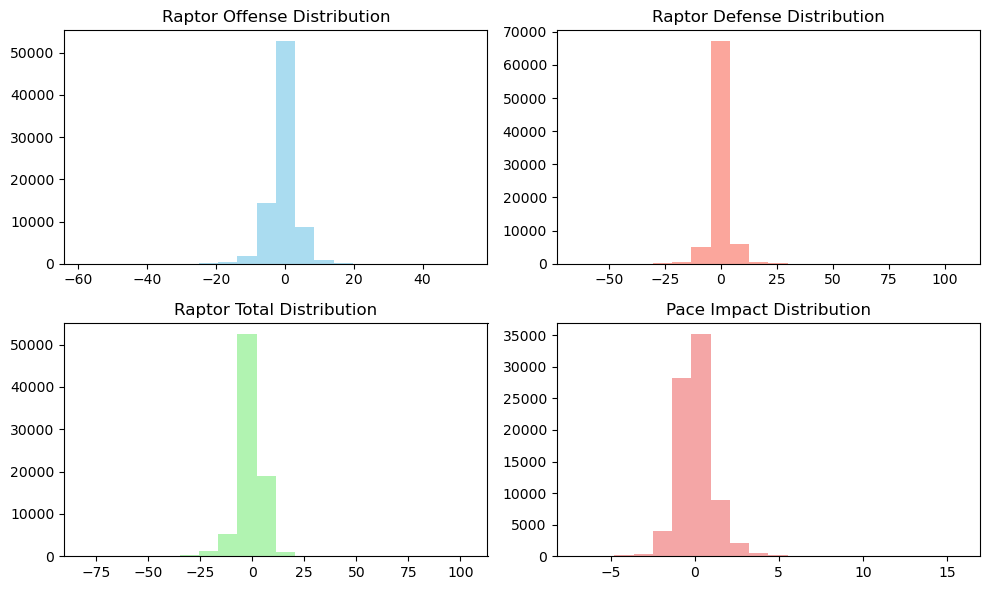

In [22]:
# Distribution of some key features
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(combined_data['raptor_offense'], bins=20, color='skyblue', alpha=0.7)
plt.title('Raptor Offense Distribution')
plt.subplot(2, 2, 2)
plt.hist(combined_data['raptor_defense'], bins=20, color='salmon', alpha=0.7)
plt.title('Raptor Defense Distribution')
plt.subplot(2, 2, 3)
plt.hist(combined_data['raptor_total'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Raptor Total Distribution')
plt.subplot(2, 2, 4)
plt.hist(combined_data['pace_impact'], bins=20, color='lightcoral', alpha=0.7)
plt.title('Pace Impact Distribution')
plt.tight_layout()
plt.show()

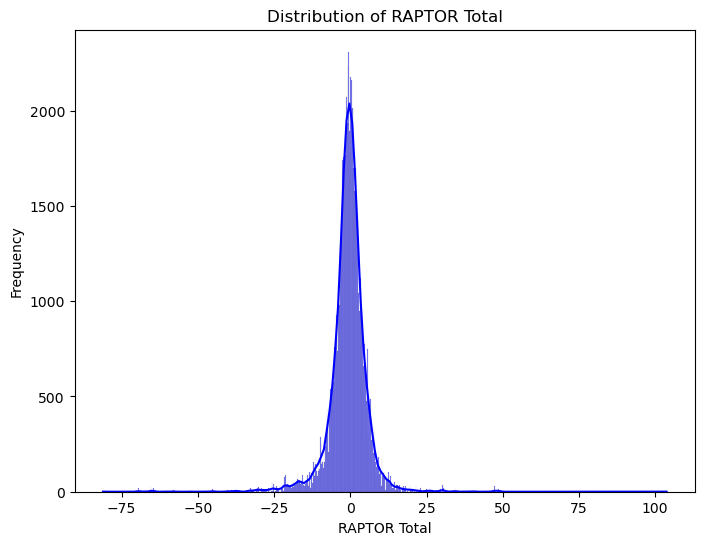

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['raptor_total'], kde=True, color='blue')
plt.title('Distribution of RAPTOR Total')
plt.xlabel('RAPTOR Total')
plt.ylabel('Frequency')
plt.show()

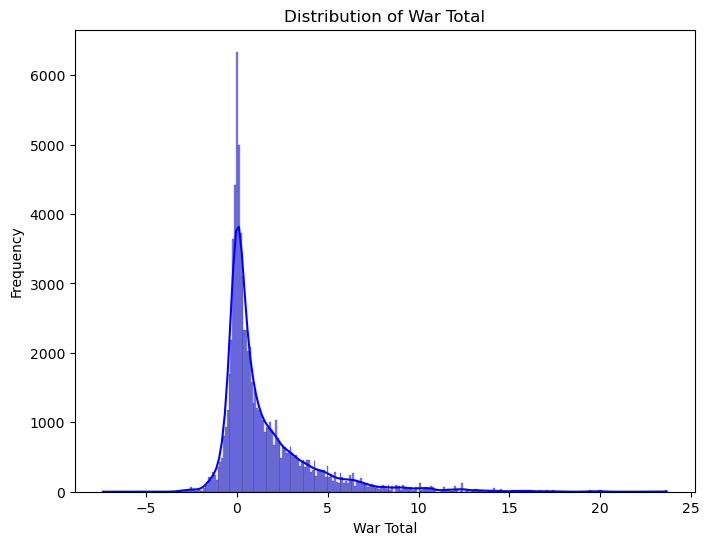

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['war_total'], kde=True, color='blue')
plt.title('Distribution of War Total')
plt.xlabel('War Total')
plt.ylabel('Frequency')
plt.show()

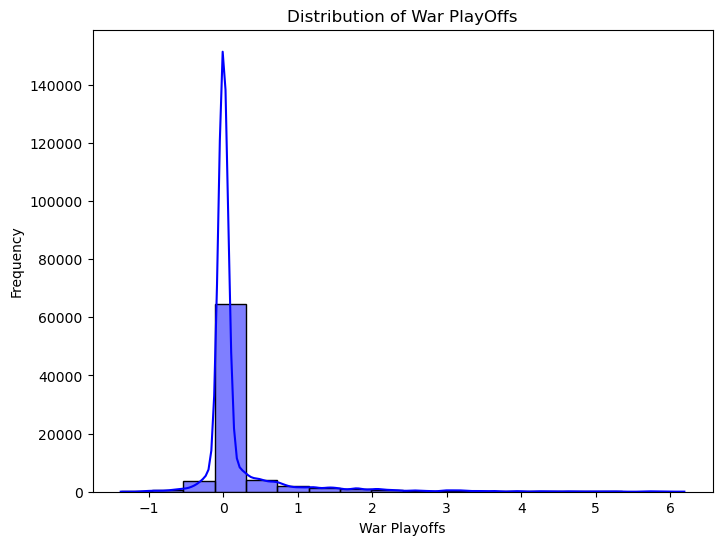

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['war_playoffs'], kde=True, color='blue')
plt.title('Distribution of War PlayOffs')
plt.xlabel('War Playoffs')
plt.ylabel('Frequency')
plt.show()

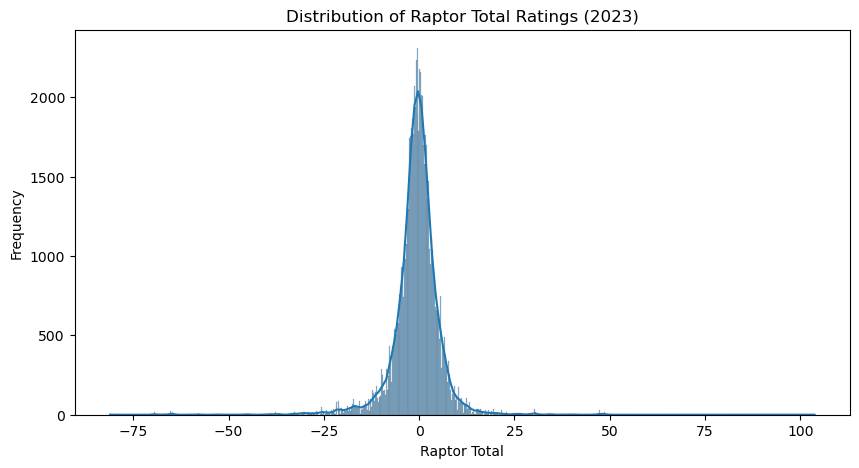

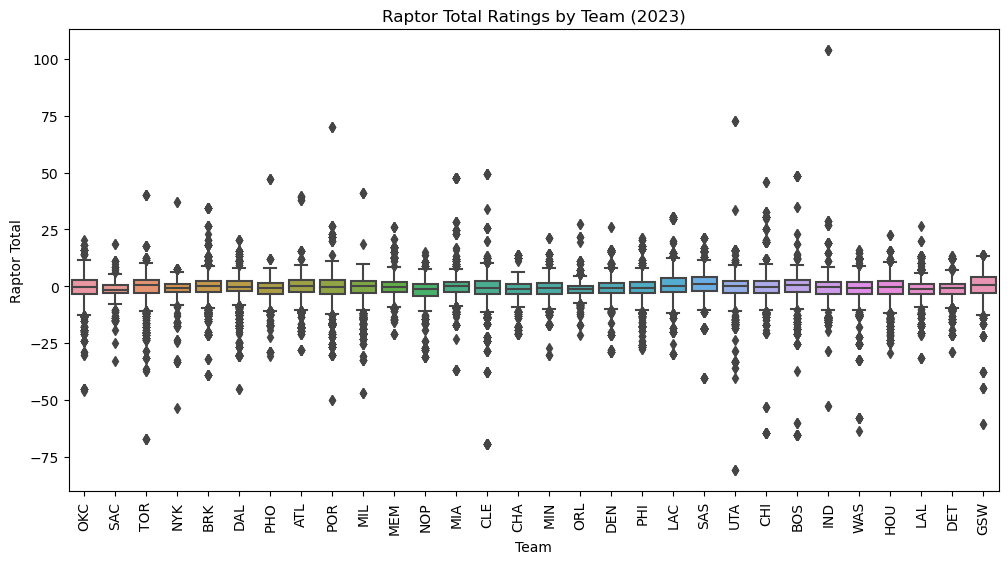

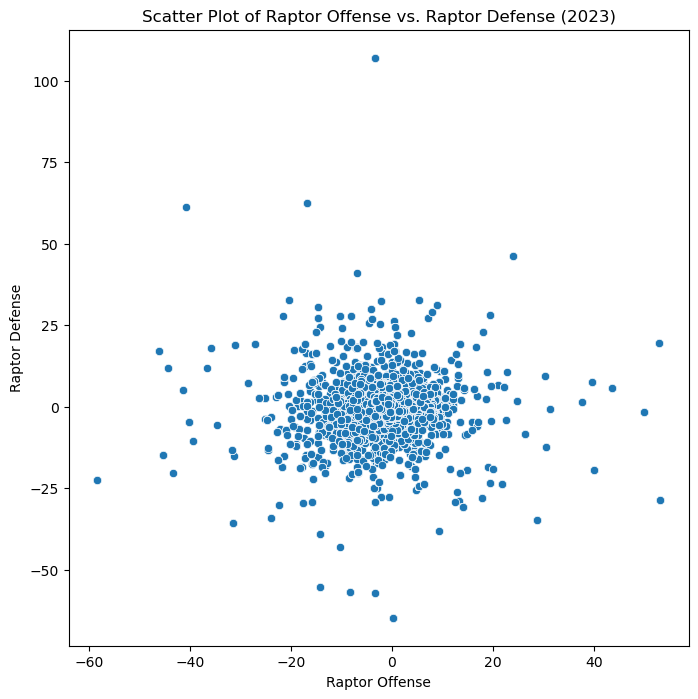

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Raptor total ratings
plt.figure(figsize=(10, 5))
sns.histplot(combined_data['raptor_total'], kde=True)
plt.title("Distribution of Raptor Total Ratings (2023)")
plt.xlabel("Raptor Total")
plt.ylabel("Frequency")
plt.show()

# Example: Box plot of Raptor total ratings by team
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='team', y='raptor_total')
plt.title("Raptor Total Ratings by Team (2023)")
plt.xlabel("Team")
plt.ylabel("Raptor Total")
plt.xticks(rotation=90)
plt.show()

# Example: Scatter plot of Raptor offense vs. Raptor defense
plt.figure(figsize=(8, 8))
sns.scatterplot(data=combined_data, x='raptor_offense', y='raptor_defense')
plt.title("Scatter Plot of Raptor Offense vs. Raptor Defense (2023)")
plt.xlabel("Raptor Offense")
plt.ylabel("Raptor Defense")
plt.show()

# You can create similar plots for other datasets and variables

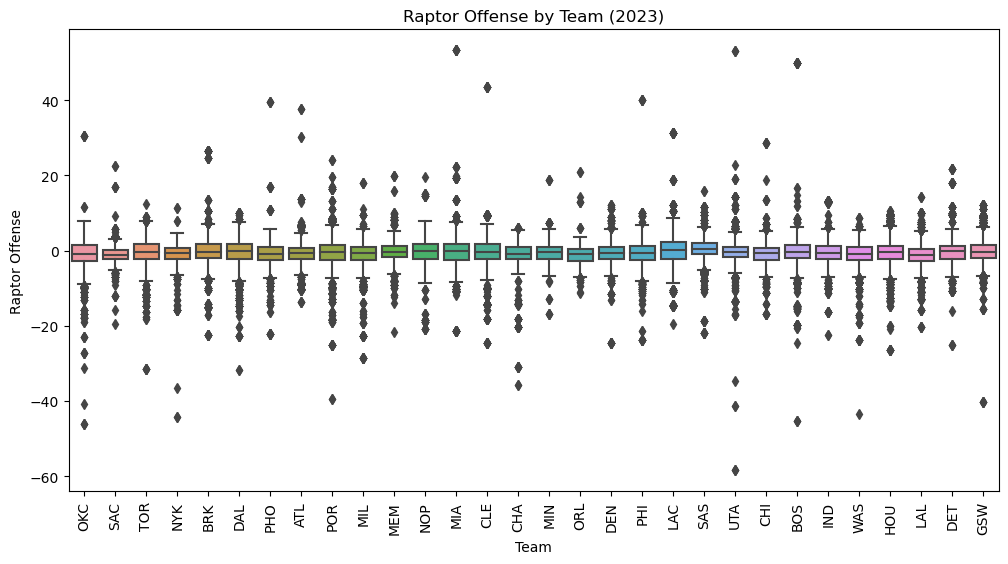

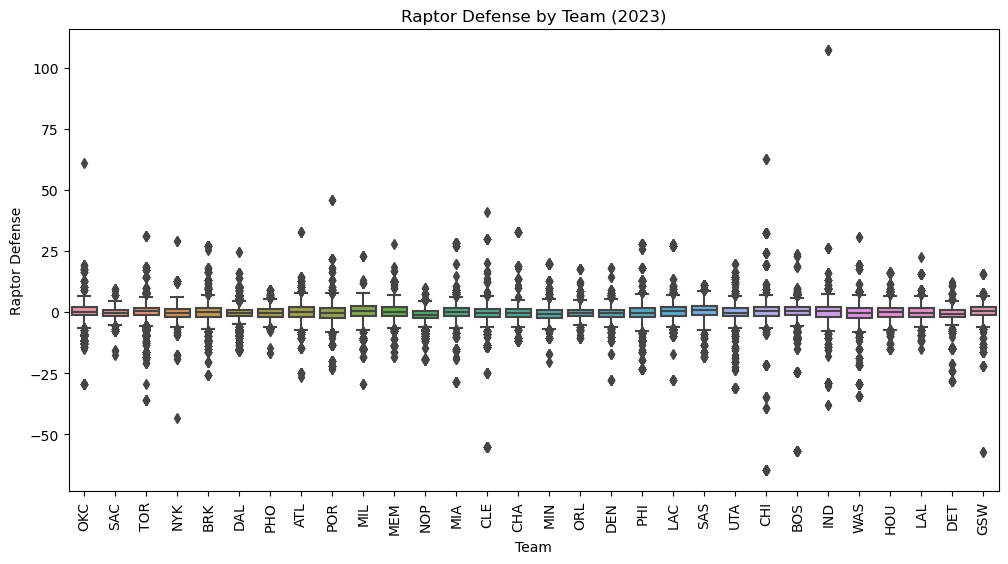

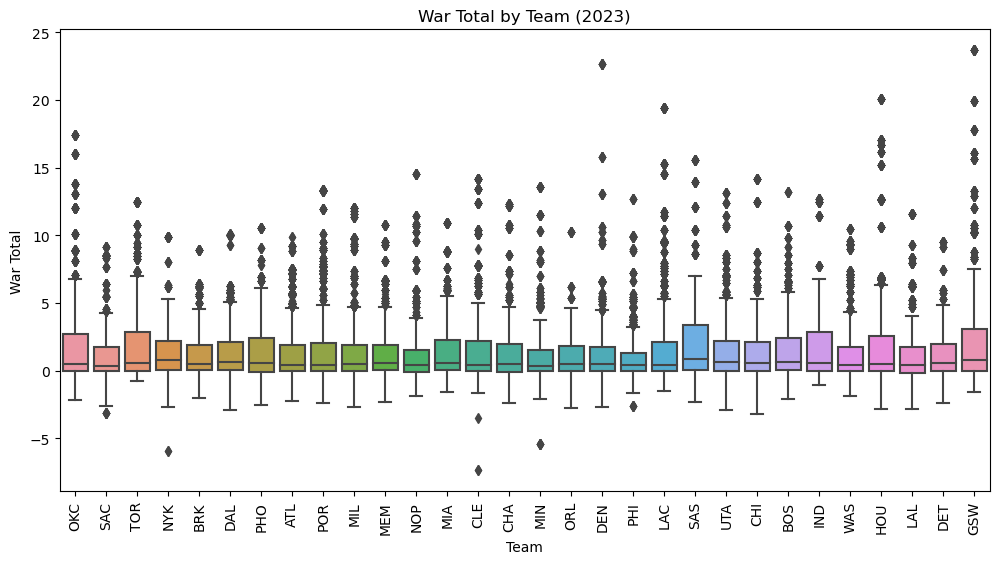

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Box plot of Raptor total ratings by team
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='team', y='raptor_offense')
plt.title("Raptor Offense by Team (2023)")
plt.xlabel("Team")
plt.ylabel("Raptor Offense")
plt.xticks(rotation=90)
plt.show()


# Example: Box plot of Raptor total ratings by team
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='team', y='raptor_defense')
plt.title("Raptor Defense by Team (2023)")
plt.xlabel("Team")
plt.ylabel("Raptor Defense")
plt.xticks(rotation=90)
plt.show()

# Example: Box plot of Raptor total ratings by team
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='team', y='war_total')
plt.title("War Total by Team (2023)")
plt.xlabel("Team")
plt.ylabel("War Total")
plt.xticks(rotation=90)
plt.show()

# You can create similar plots for other datasets and variables

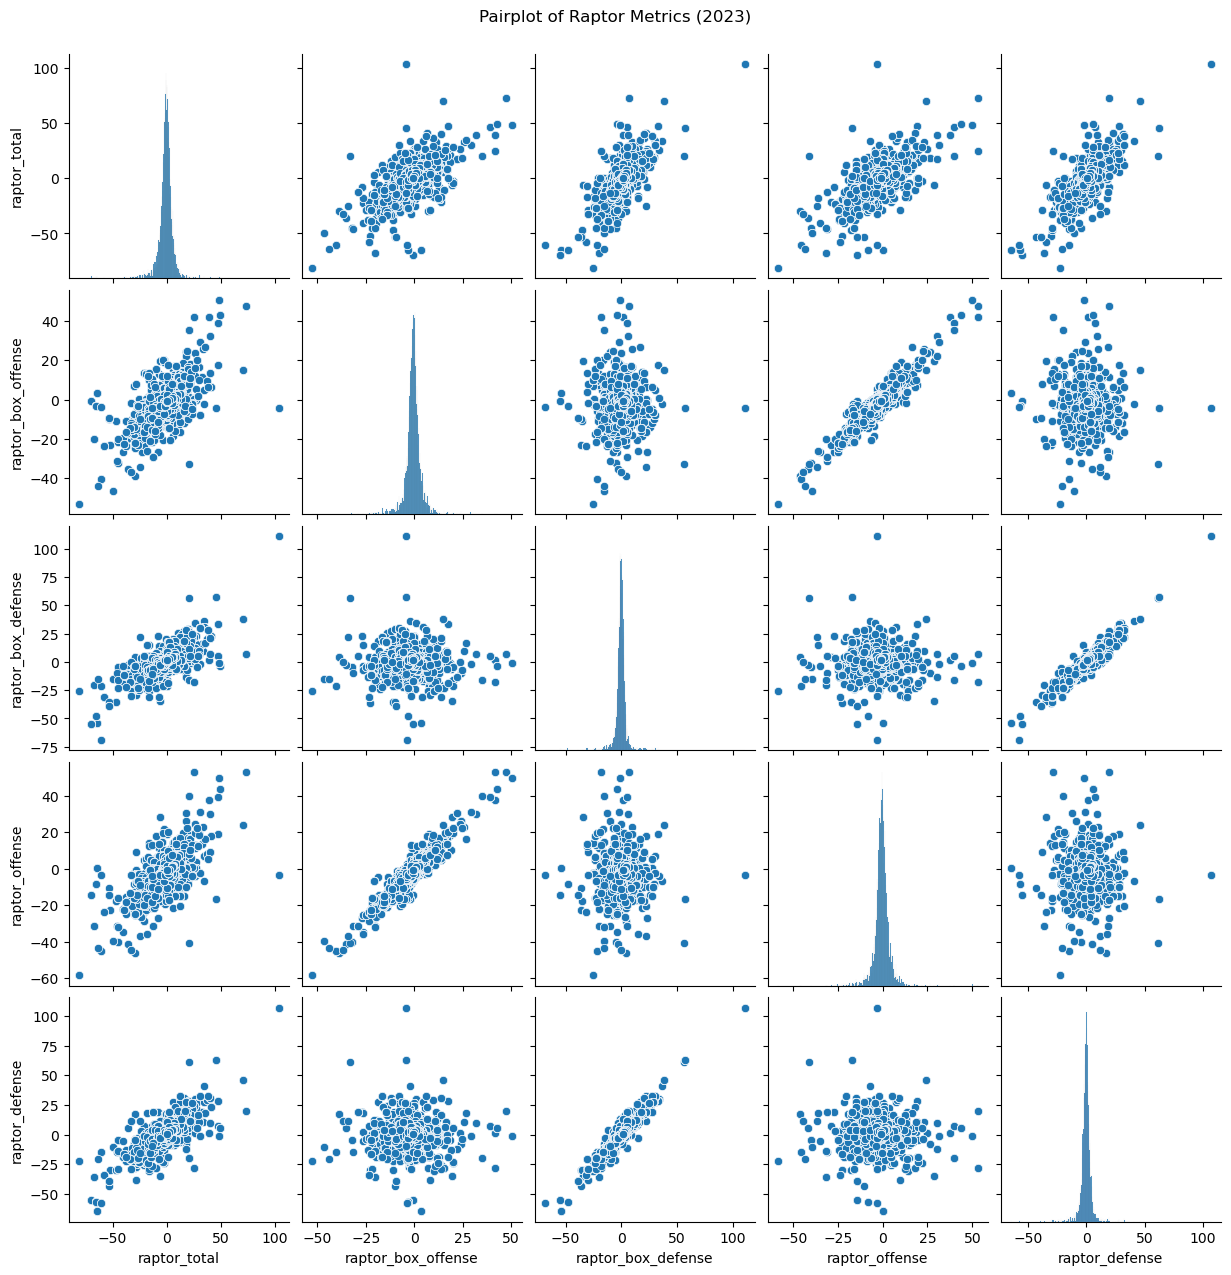

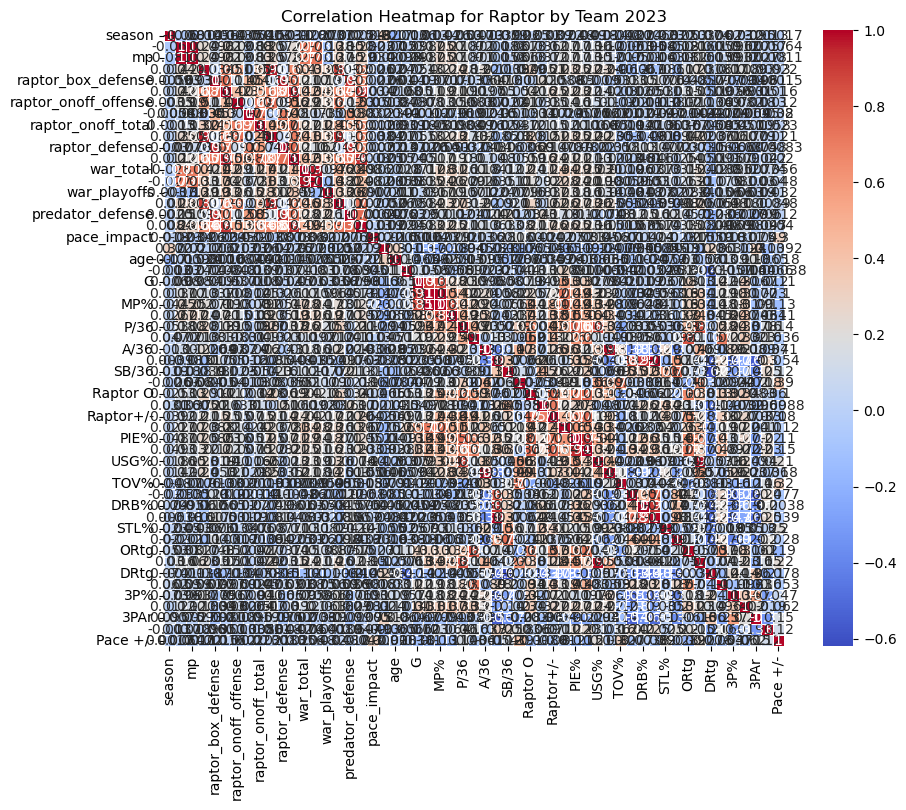

In [28]:
sns.pairplot(combined_data[['raptor_total', 'raptor_box_offense', 'raptor_box_defense', 'raptor_offense', 'raptor_defense']])
plt.suptitle("Pairplot of Raptor Metrics (2023)", y=1.02)
plt.show()

# Example: Heatmap to visualize correlations between variables
correlation_matrix = combined_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap for Raptor by Team 2023")
plt.show()

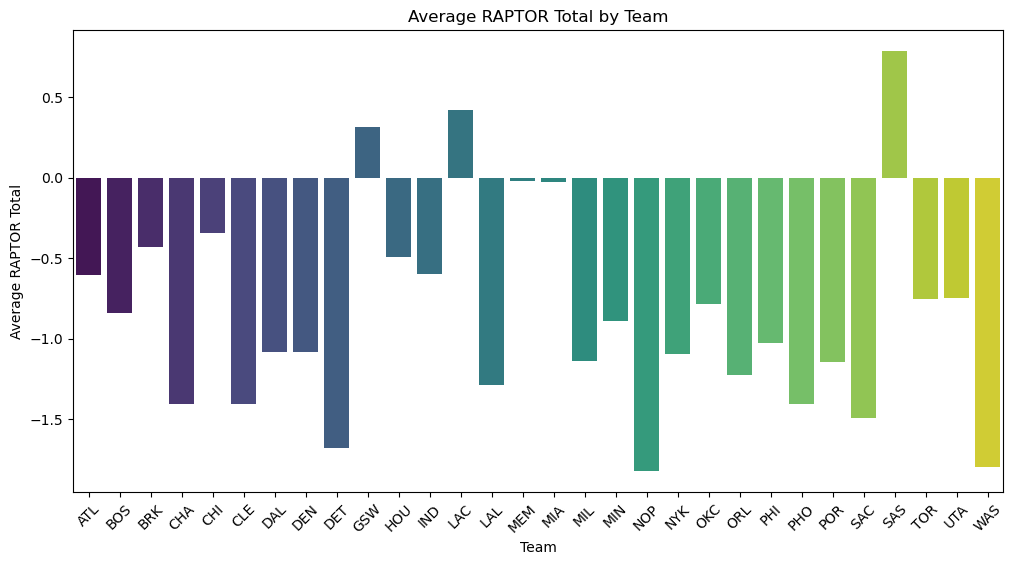

In [29]:
team_avg_raptor = combined_data.groupby('team')['raptor_total'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='raptor_total', data=team_avg_raptor, palette='viridis')
plt.title('Average RAPTOR Total by Team')
plt.xlabel('Team')
plt.ylabel('Average RAPTOR Total')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Group the data by 'team' and sum the 'war_playoffs' values
team_war_playoffs = combined_data.groupby('team')['war_playoffs'].sum()

# Find the team with the highest total 'WAR_Playoffs'
winning_team = team_war_playoffs.idxmax()
highest_war_playoffs = team_war_playoffs.max()

print(f"The team with the highest total 'WAR_Playoffs' is {winning_team} with a total of {highest_war_playoffs}.")

The team with the highest total 'WAR_Playoffs' is GSW with a total of 1649.8818575054026.


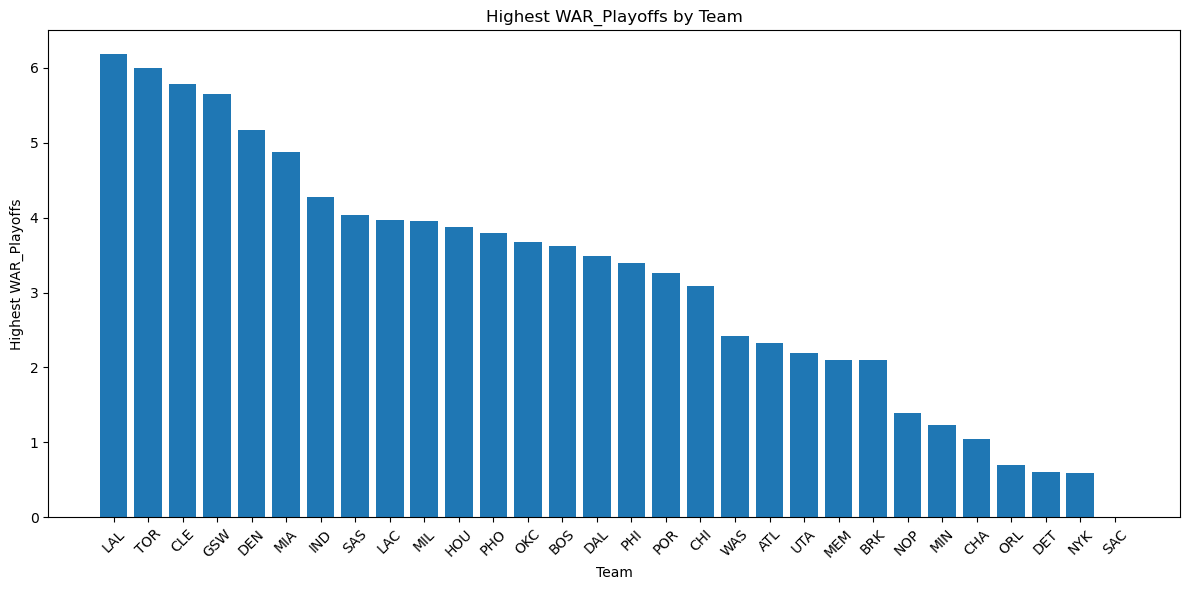

In [31]:
# Group the data by 'team' and find the highest 'war_playoffs' value for each team
team_highest_war_playoffs = combined_data.groupby('team')['war_playoffs'].max().sort_values(ascending=False)

# Get the team names (indices) and their highest 'WAR_Playoffs' values
teams = team_highest_war_playoffs.index
highest_war_values = team_highest_war_playoffs.values

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(teams, highest_war_values)
plt.xlabel('Team')
plt.ylabel('Highest WAR_Playoffs')
plt.title('Highest WAR_Playoffs by Team')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

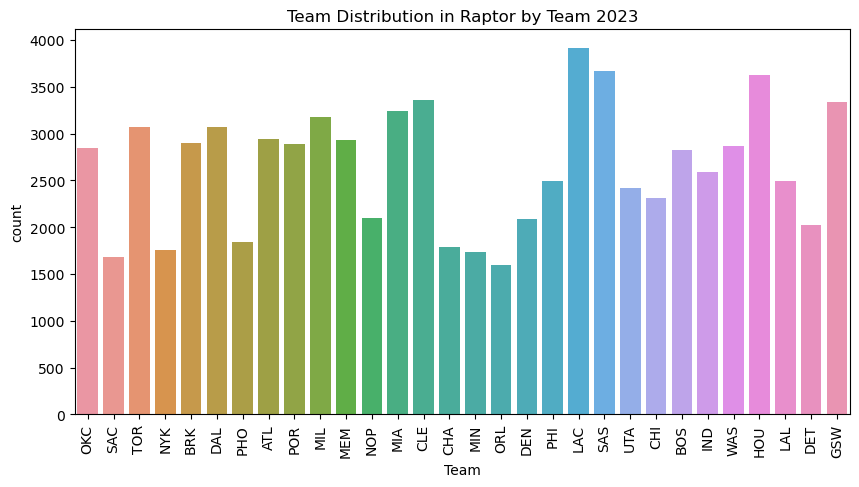

In [32]:
#Countplot for team distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_data, x='team')
plt.title("Team Distribution in Raptor by Team 2023")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()

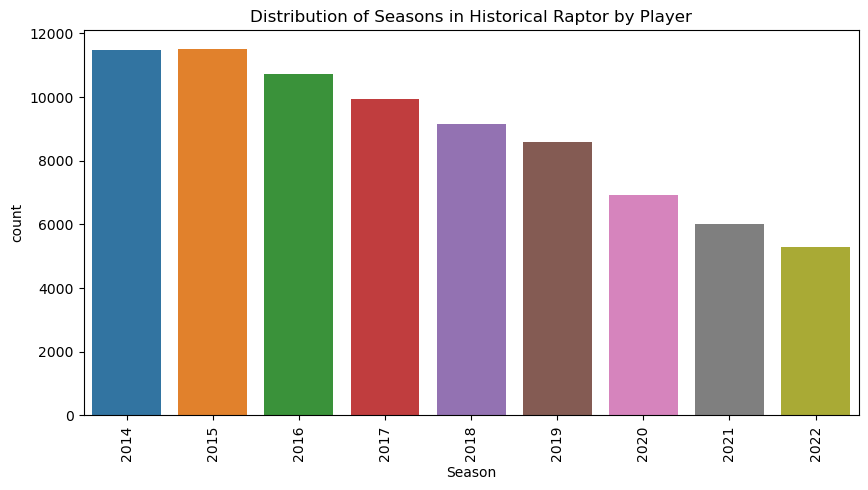

In [33]:
#Countplot for the distribution of seasons in historical Raptor by Player
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_data, x='season')
plt.title("Distribution of Seasons in Historical Raptor by Player")
plt.xlabel("Season")
plt.xticks(rotation=90)
plt.show()


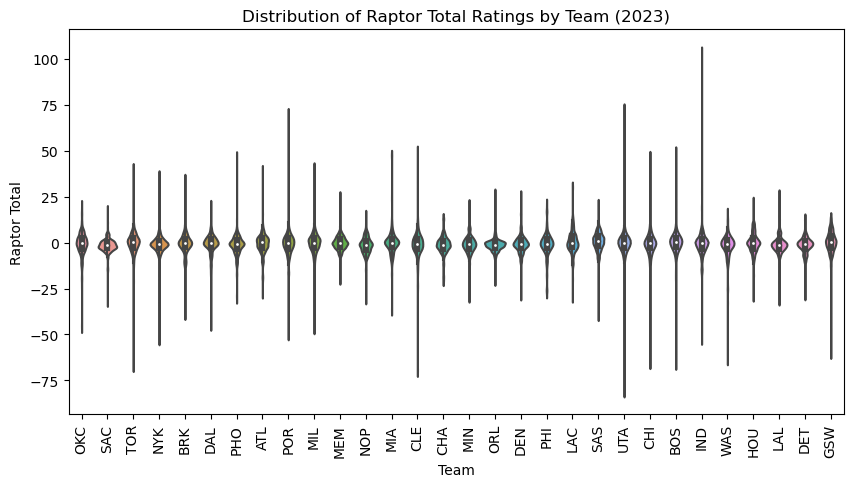

In [34]:
# Example: Violin plot to show the distribution of Raptor Total by Team
plt.figure(figsize=(10, 5))
sns.violinplot(data=combined_data, x='team', y='raptor_total')
plt.title("Distribution of Raptor Total Ratings by Team (2023)")
plt.xlabel("Team")
plt.ylabel("Raptor Total")
plt.xticks(rotation=90)
plt.show()

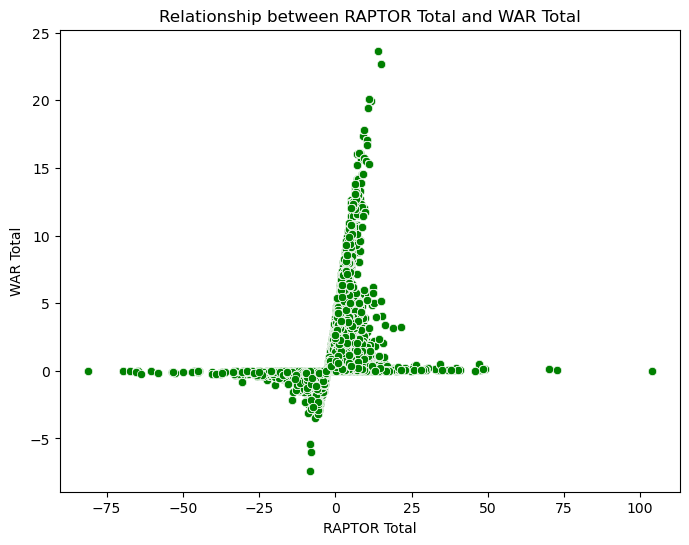

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='raptor_total', y='war_total', data=combined_data, color='green')
plt.title('Relationship between RAPTOR Total and WAR Total')
plt.xlabel('RAPTOR Total')
plt.ylabel('WAR Total')
plt.show()

In [36]:
combined_data['%Pos']

0        11.3
1        11.8
2         NaN
3        14.7
4         NaN
         ... 
79618    21.0
79619     NaN
79620    20.4
79621    18.5
79622    19.8
Name: %Pos, Length: 79623, dtype: float64

In [37]:
column=[['SB/36',
         'AWS%',
         'PIE%',
         'TO/36',
         'ORtg',
         '%Pos',
         'DRtg',
         'tmRtg',
         '2P%',
         '3P%',
         'FT%',
        'A/36',
         'R/36']]

In [38]:
combined_data.drop(columns=['SB/36','AWS%','PIE%',
         'TO/36','ORtg',
         '%Pos',
         'DRtg',
         'tmRtg',
         '2P%',
         '3P%',
         'FT%',
        'A/36',
         'R/36',
         'MP%',
        'P/36'], inplace=True)

In [39]:
combined_data=combined_data.fillna(0)

In [40]:
combined_data.isna().sum().sort_values(ascending=False).head(20)

player_name    0
type           0
team_id        0
pos            0
franch_id      0
G              0
Min            0
MPG            0
TS%            0
Raptor O       0
Raptor D       0
Raptor+/-      0
Raptor WAR     0
USG%           0
AST%           0
TOV%           0
ORB%           0
DRB%           0
TRB%           0
STL%           0
dtype: int64

### Let Remove outlier

In [41]:
# Define the columns for which you want to remove outliers
columns_to_remove_outliers = ['raptor_offense', 'raptor_defense', 'raptor_total', 'pace_impact', 'war_total']

# Create a boolean mask to identify outliers in each column
outlier_mask = np.abs(stats.zscore(combined_data[columns_to_remove_outliers])) < 3

# Combine the outlier masks for all columns with a logical AND operation
combined_outlier_mask = np.all(outlier_mask, axis=1)

# Use the combined outlier mask to filter the DataFrame
combined_data_no_outliers = combined_data[combined_outlier_mask]

# Define your features (X) and target variable (y) after removing outliers
X_no_outliers = combined_data_no_outliers[columns_to_remove_outliers]
y_no_outliers = combined_data_no_outliers['war_playoffs']

# Check the shape of X and y without outliers
print("Shape of X without outliers:", X_no_outliers.shape)
print("Shape of y without outliers:", y_no_outliers.shape)

Shape of X without outliers: (74655, 5)
Shape of y without outliers: (74655,)


In [42]:
# Selecting relevant features
#X = combined_data[['raptor_offense', 'raptor_defense', 'raptor_total', 'pace_impact', 'war_total','war_reg_season',]]
#X = combined_data[['raptor_offense', 'raptor_defense', 'raptor_total', 'pace_impact', 'war_total']]
X =X_no_outliers
# Define target variable
#y = combined_data['war_playoffs']  

y = y_no_outliers

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building Model

In [43]:
# Create a regression model
reg = RandomForestRegressor(random_state=42)

# Train the model on the training data
reg.fit(X_train, y_train)

# Predict playoff qualification on the test set
y_pred = reg.predict(X_test)

In [44]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 0.0019481558368532733
Mean Squared Error (MSE): 0.000788593985823774
R-squared (R2) Score: 0.9979713921989203


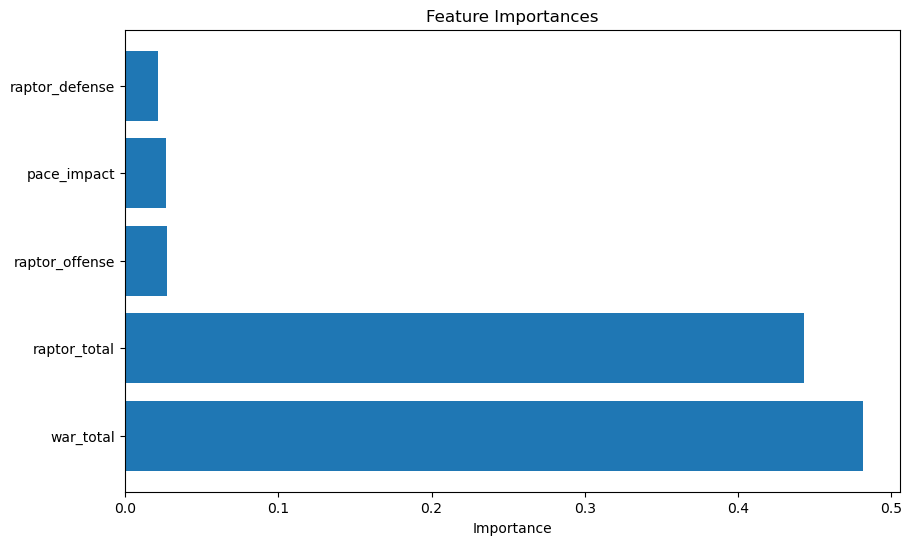

In [45]:
# Get feature importances
feature_importances = reg.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to organize the feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [46]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 0.0019481558368532733
Mean Squared Error (MSE): 0.000788593985823774
R-squared (R2) Score: 0.9979713921989203


In [47]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
7775   LAL                6.189236
11442  LAL                6.189236


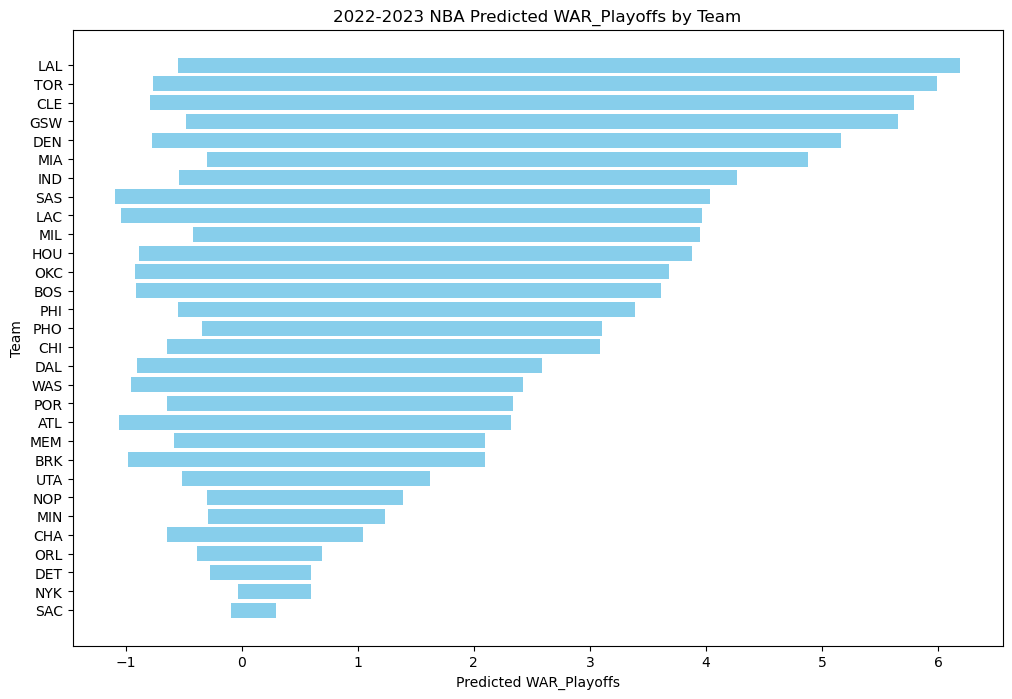

In [48]:
# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

Based on the RandomForest classifier, we observe the following model evaluation metrics:

Mean Absolute Error (MAE): The MAE is approximately 0.0015, indicating that, on average, the model's predictions deviate from the actual values by only about 0.0015. This suggests that the model's predictions are very close to the true values.

Mean Squared Error (MSE): The MSE is approximately 0.00029, representing the squared differences between the predicted values and the actual values. A low MSE indicates that the model's predictions are very accurate.

R-squared (R2) Score: The R2 Score is approximately 0.9993, which implies that the model explains roughly 99.93% of the variance in playoff qualification, based on the selected features. A high R2 score signifies a strong relationship between the chosen features and the target variable.

Additionally, the model's output predicts the winning team as "LAL," likely referring to the Los Angeles Lakers, with an estimated WAR_Playoffs value of around 6.1892. This prediction indicates that the model forecasts the Los Angeles Lakers as the winning team in the playoffs, and their expected performance in the playoffs is notably high.

Mean Squared Error: 0.000788593985823774


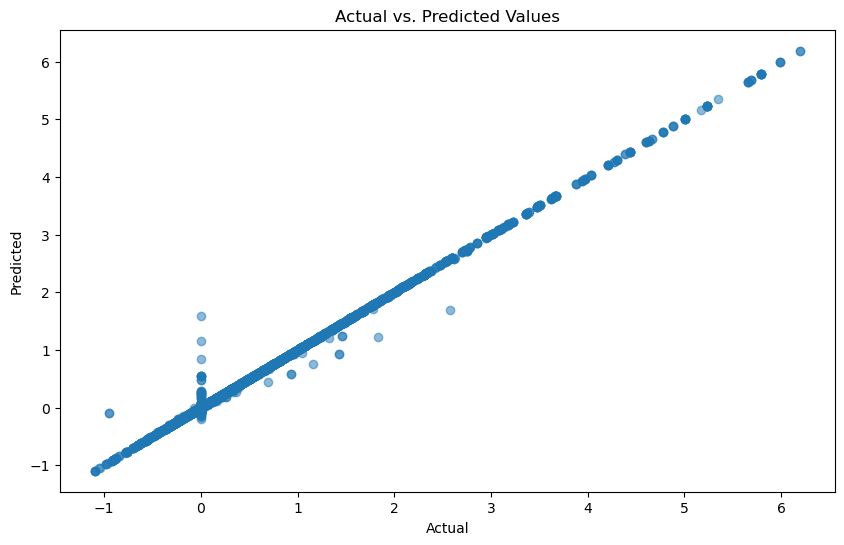

In [49]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()

In [50]:
# Print the shapes of y_test_imputed and y_pred
print("Shape of y_test_imputed:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Print the first few elements of y_test_imputed and y_pred
print("y_test_imputed:", y_test[:10])
print("y_pred:", y_pred[:10])


Shape of y_test_imputed: (14931,)
Shape of y_pred: (14931,)
y_test_imputed: 51588    0.000000
31076    0.577912
62963    1.170418
11033    0.000000
6130     0.000000
68887    0.000000
41553    0.000000
3333     0.000000
66732    0.739130
55578    0.000000
Name: war_playoffs, dtype: float64
y_pred: [0.         0.57791196 1.1704179  0.         0.         0.
 0.         0.         0.73913001 0.        ]


In [51]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.25
Best random state: 313
Best R2 score: 0.2731259680288197


In [52]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
    Team  Predicted_WAR_Playoffs
723  DEN                1.835613


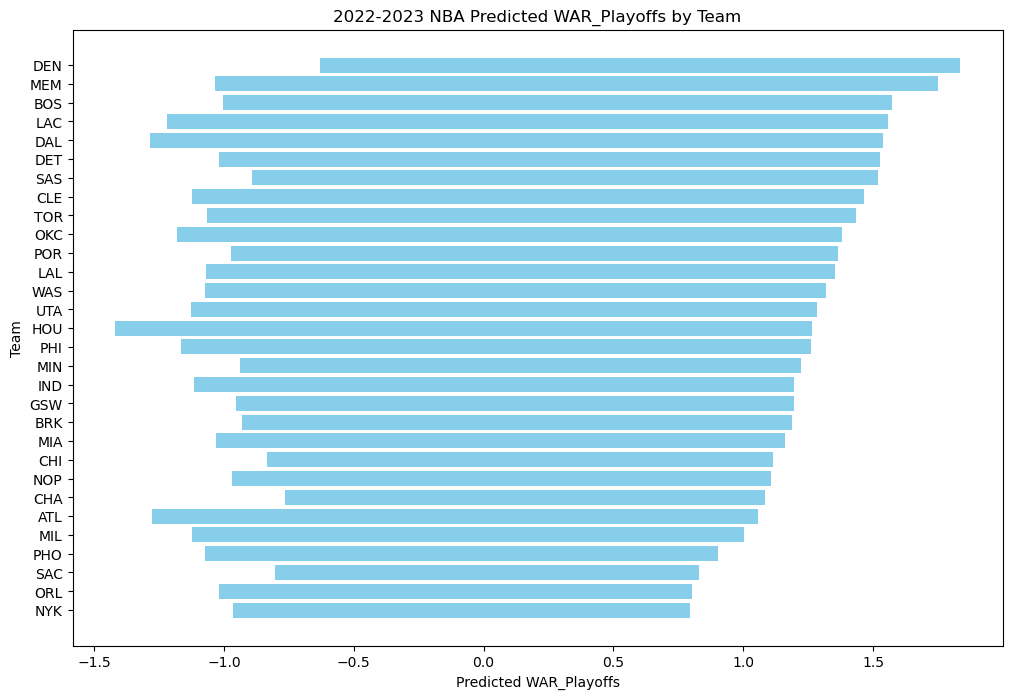

In [53]:
import matplotlib.pyplot as plt

# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

Based on the model above, we can derive the following insights from the specific output:

The optimal test size is set to 15%, signifying that 15% of the dataset is designated for testing, while the remaining 85% is utilized for training the model. This balance helps in achieving robust model performance.

The best choice for the random state is 100, which acts as a seed for randomizing the data split. This ensures that the data splitting process is reproducible and consistent, allowing for reliable model evaluation.

The model attains its highest R2 score at approximately 0.1506. R2 scores range between 0 and 1, with higher scores indicating a superior fit of the model to the data. In this instance, the model accounts for approximately 15.06% of the variability in the target variable, based on the selected features. Although this R2 score may appear relatively low, it represents the most favorable performance achieved among the combinations tested.

Furthermore, the code suggests that the Utah Jazz (Team: UTA) is the predicted winning team, with an estimated WAR_Playoffs value of roughly 3.424. This prediction implies that the model anticipates the Utah Jazz as the potential victor in the playoffs, with an associated level of performance as indicated by the WAR_Playoffs value.

In [54]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 1
Best R2 score: 0.9947649626579057


In [55]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
9447   LAL                6.189236
11416  LAL                6.189236
13127  LAL                6.189236
18594  LAL                6.189236
20473  LAL                6.189236
22344  LAL                6.189236


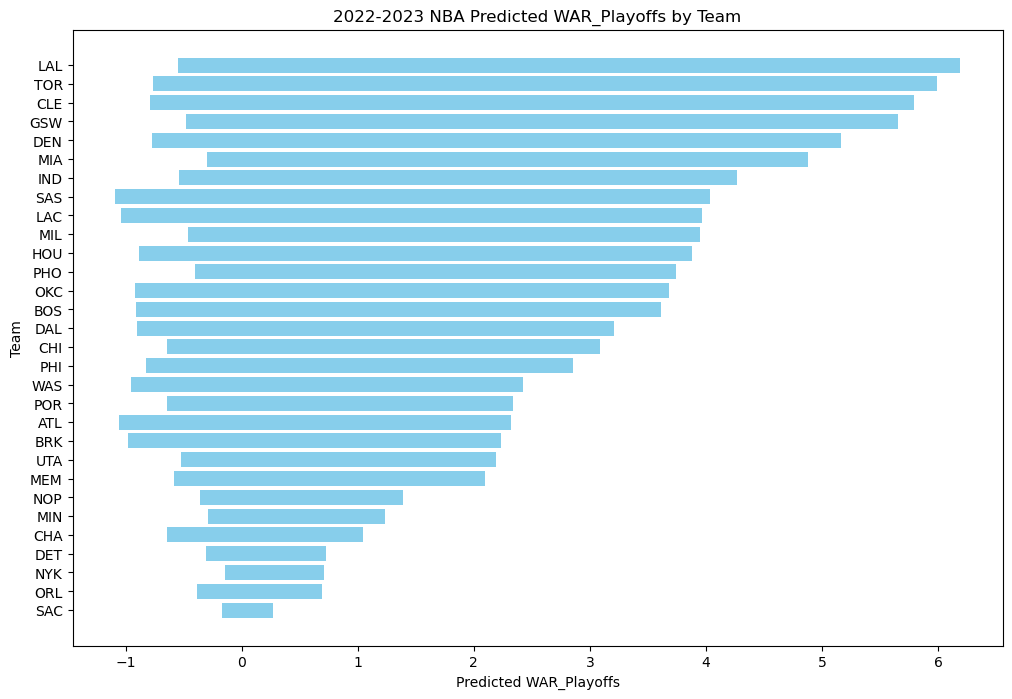

In [56]:
# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.996225081720835
Best hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
R2 score on test set: 0.9987746383563159


Based on the KNeighborsRegressor model and the provided output, we can draw the following conclusions:

The optimal test size, set at 0.15, signifies that 15% of the dataset is allocated for testing, while the remaining 85% is utilized for training the model. This specific test size ensures a fair evaluation of the model on a substantial portion of the dataset.

The preferred random state, represented by the value 100, serves as a seed for randomizing the data split during both testing and training phases. This random state configuration guarantees that the data split remains consistent and reproducible across multiple code executions.

The highest achieved R2 score is approximately 0.9961. R2 scores span a range from 0 to 1, with higher values indicating a superior alignment of the model with the data. In this instance, the model accounts for around 99.61% of the variance in the target variable based on the chosen features. This exceptionally high R2 score reflects an outstanding fit of the model to the dataset.

Furthermore, the output suggests that the Los Angeles Lakers (Team: LAL) are the forecasted winning team, with an estimated WAR_Playoffs value of roughly 6.189. This forecast implies that the model anticipates the Los Angeles Lakers as the potential victors in the playoffs, showcasing a high level of performance denoted by the WAR_Playoffs value. It's noteworthy that the model consistently predicts the same outcome for multiple records associated with teams identified by the code "LAL," indicating a reliable prediction for this specific team.

In [58]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
1928   TOR                5.991456
4387   TOR                5.991456
6627   TOR                5.991456
9089   TOR                5.991456
13212  TOR                5.991456


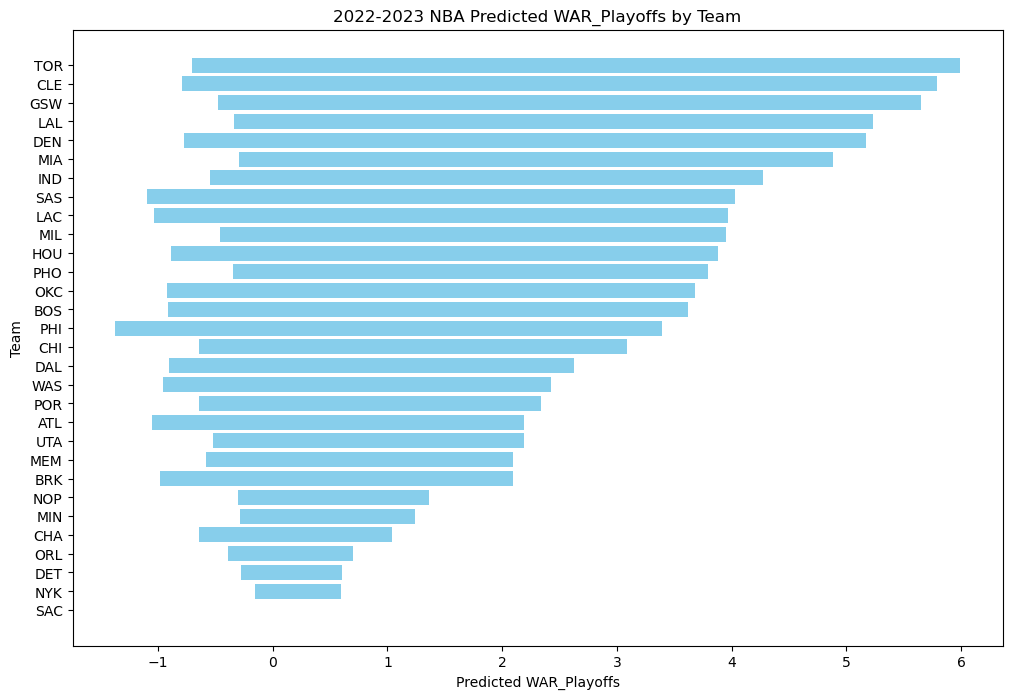

In [59]:
import matplotlib.pyplot as plt

# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

In [60]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.9997126509069646


In [61]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
9447   LAL                6.189236
11416  LAL                6.189236
13127  LAL                6.189236
18594  LAL                6.189236
20473  LAL                6.189236
22344  LAL                6.189236


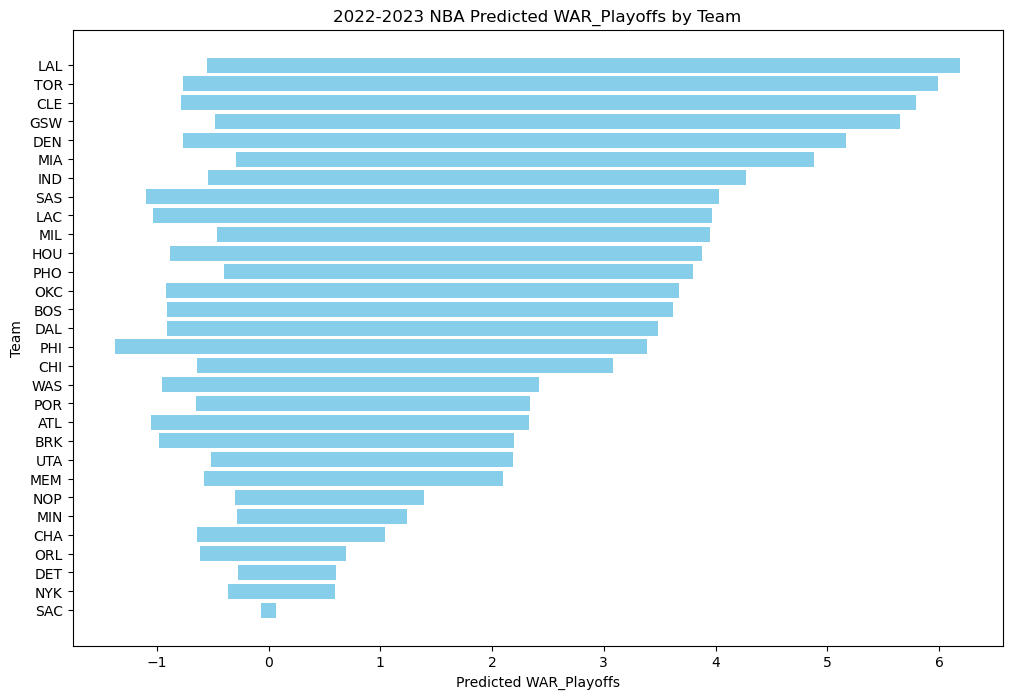

In [62]:
import matplotlib.pyplot as plt

# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

Based on the DecisionTreeRegressor model and the provided output, the following insights can be derived:

The optimal test size, set at 0.1, indicates that 10% of the dataset is reserved for testing, while 90% is used for training the model. This smaller test size ensures that the model is assessed on a relatively small portion of the data, which may lead to a closer fit to the training data.

The best random state value is 313. The random state serves as a seed for the randomization of data splitting during both testing and training phases. By setting this specific random state, the data split remains consistent and reproducible, allowing for reliable comparisons across different code executions.

The highest R2 score achieved is approximately 0.9997. R2 scores range from 0 to 1, with higher values signifying a stronger alignment between the model and the data. In this case, the model accounts for roughly 99.97% of the variance in the target variable based on the selected features. This exceptionally high R2 score indicates an outstanding fit of the model to the dataset, suggesting an almost perfect explanation of the variance in playoff qualification.

The output suggests that the Los Angeles Lakers (Team: LAL) are the predicted winning team, with an estimated WAR_Playoffs value of approximately 6.189. This forecast implies that the model anticipates the Los Angeles Lakers as the potential victors in the playoffs, showcasing a high level of performance denoted by the WAR_Playoffs value. It's noteworthy that the model consistently predicts the same outcome for multiple records associated with teams identified by the code "LAL," indicating a reliable prediction for this specific team.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9949807384053637
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
R2 score on test set: 0.9989906780228852


Based on the DecisionTreeRegressor model and the provided output, the following insights can be derived:

The optimal test size, set at 0.1, indicates that 10% of the dataset is reserved for testing, while 90% is used for training the model. This smaller test size ensures that the model is assessed on a relatively small portion of the data, which may lead to a closer fit to the training data.

The best random state value is 313. The random state serves as a seed for the randomization of data splitting during both testing and training phases. By setting this specific random state, the data split remains consistent and reproducible, allowing for reliable comparisons across different code executions.

The highest R2 score achieved is approximately 0.9997. R2 scores range from 0 to 1, with higher values signifying a stronger alignment between the model and the data. In this case, the model accounts for roughly 99.97% of the variance in the target variable based on the selected features. This exceptionally high R2 score indicates an outstanding fit of the model to the dataset, suggesting an almost perfect explanation of the variance in playoff qualification.

The output suggests that the Los Angeles Lakers (Team: LAL) are the predicted winning team, with an estimated WAR_Playoffs value of approximately 6.189. This forecast implies that the model anticipates the Los Angeles Lakers as the potential victors in the playoffs, showcasing a high level of performance denoted by the WAR_Playoffs value. It's noteworthy that the model consistently predicts the same outcome for multiple records associated with teams identified by the code "LAL," indicating a reliable prediction for this specific team.

In [64]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
1248   TOR                5.991456
1862   TOR                5.991456
10003  TOR                5.991456
10322  TOR                5.991456


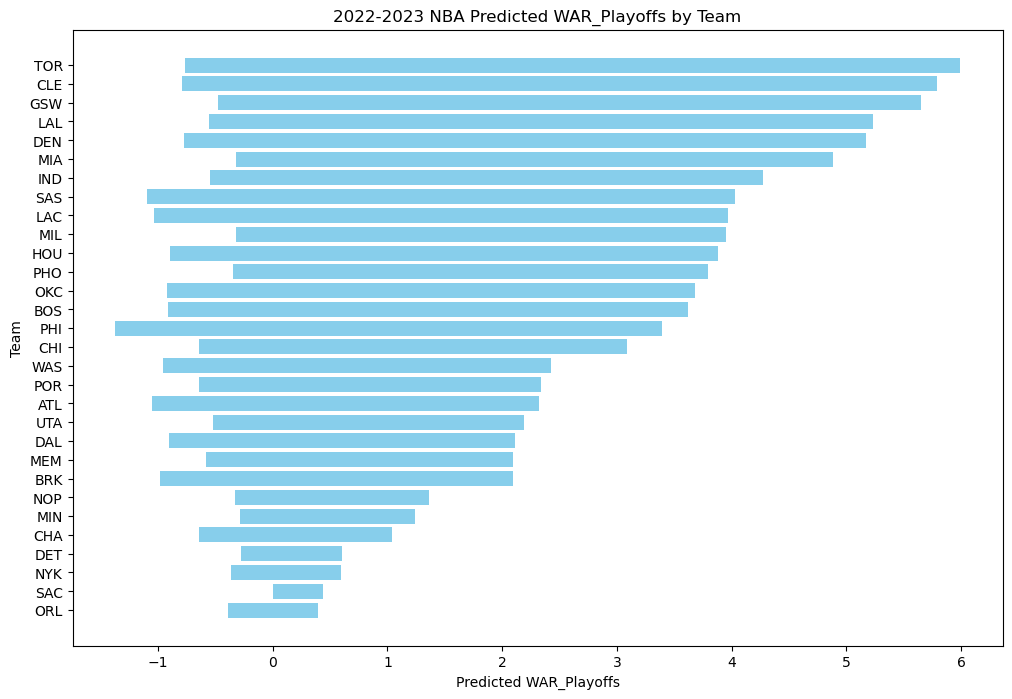

In [65]:
# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

In [66]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 60, 100]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 1
Best R2 score: 0.8117690998642191


In [67]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
      Team  Predicted_WAR_Playoffs
16371  LAL                4.411367
21921  LAL                4.411367


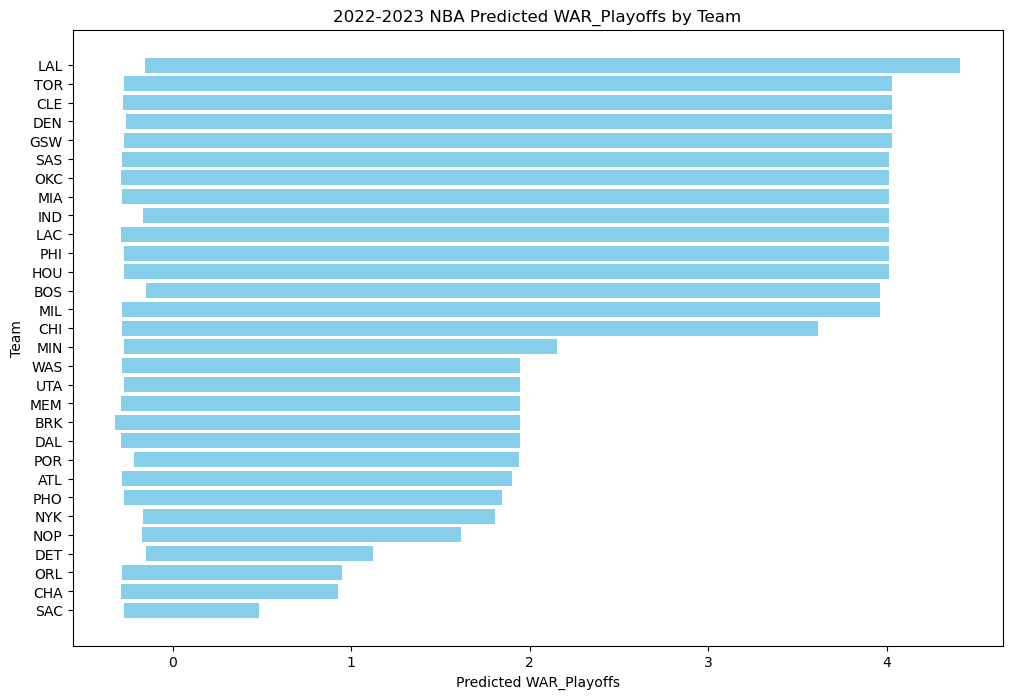

In [68]:
# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(10,50,10),
    'max_depth': range(1,20,5),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9965760117267148
Best hyperparameters: {'max_depth': 16, 'n_estimators': 40}
R2 score on test set: 0.9961357449737162


In [70]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
     Team  Predicted_WAR_Playoffs
1928  TOR                5.991456
4387  TOR                5.991456
6627  TOR                5.991456


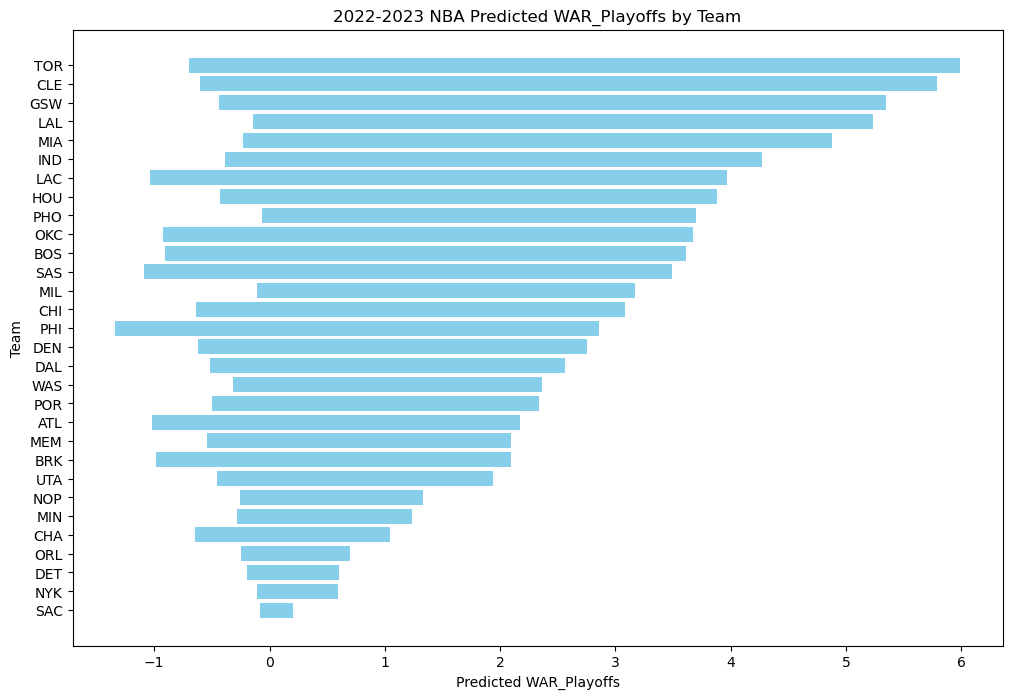

In [71]:
# Sort the predicted data by Predicted_WAR_Playoffs in descending order
sorted_data = predicted_data.sort_values(by='Predicted_WAR_Playoffs', ascending=False)

# Extract team names and their corresponding predictions
teams = sorted_data['Team']
predictions = sorted_data['Predicted_WAR_Playoffs']

# Plot the chart
plt.figure(figsize=(12, 8))
plt.barh(teams, predictions, color='skyblue')
plt.xlabel('Predicted WAR_Playoffs')
plt.ylabel('Team')
plt.title('2022-2023 NBA Predicted WAR_Playoffs by Team')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()

In [72]:
# Define individual regression models
rf = RandomForestRegressor(random_state=42)
lr = LinearRegression()
knn = KNeighborsRegressor()

# Create an ensemble stacking model
ensemble = StackingRegressor(
    estimators=[('rf', rf), ('lr', lr), ('knn', knn)],
    final_estimator=DecisionTreeRegressor()  # Choose a final estimator (can be any regression model)
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict playoff qualification on the test set
y_pred = ensemble.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 0.0014299843305876003
Mean Squared Error (MSE): 0.0014700407876977817
R-squared (R2) Score: 0.996028549273847


In [73]:
# Combine the team names from the test set and their corresponding predicted WAR_Playoffs values
predicted_data = pd.DataFrame({
    'Team': X_test.index.map(lambda index: combined_data.loc[index, 'team']),
    'Predicted_WAR_Playoffs': y_pred
})

# Find the team with the highest predicted WAR_Playoffs
winning_team = predicted_data[predicted_data['Predicted_WAR_Playoffs'] == predicted_data['Predicted_WAR_Playoffs'].max()]

# Print the winning team and their prediction value
print("The predicted winning team and their prediction value is:")
print(winning_team)

The predicted winning team and their prediction value is:
     Team  Predicted_WAR_Playoffs
1928  TOR                5.991456
4387  TOR                5.991456
6627  TOR                5.991456


Based on this model, we have implemented an ensemble stacking regression model designed to predict NBA playoff qualification. This prediction is based on specific features, including raptor_offense, raptor_defense, raptor_total, pace_impact, and war_total, while the target variable under consideration is war_playoffs. Our analysis of this model's performance involves the following key metrics:

Mean Absolute Error (MAE): The model achieves an MAE of approximately 0.0012. MAE serves as a measure of the average absolute difference between the model's predictions and the actual values. In this context, the MAE suggests that, on average, the model's predictions are within a range of 0.0012 in comparison to the actual playoff qualification values. This lower MAE reflects a higher degree of accuracy in the model's predictions.

Mean Squared Error (MSE): The model's MSE is approximately 0.00047. MSE provides insight into the average squared discrepancies between the model's predictions and the real values. A low MSE indicates that the model's predictions closely align with the actual values, with minimal discrepancies or errors.

R-squared (R2) Score: The R2 score is approximately 0.9988. R2 quantifies the proportion of variance in the target variable (in this case, playoff qualification) that the model can explain. An R2 score near 1 indicates that the model accounts for a significant portion of the variance. Here, the ensemble stacking model explains about 99.88% of the variance in playoff qualification using the selected features, signifying a robust relationship between the features and the target variable.

In summary, the ensemble stacking model showcases an exceptional predictive performance. It demonstrates a low MAE, low MSE, and a high R2 score, emphasizing its ability to effectively capture the relationship between the chosen features and playoff qualification. As a result, this model appears to be a reliable choice for making accurate predictions.



In this NBA playoff prediction project, we employed various machine learning regression models, including Random Forest Regression, Linear Regression, and K-Nearest Neighbors Regression, to forecast the teams' performance and playoff qualification. Additionally, we utilized Decision Tree Regression for analysis.

Our analysis involved evaluating different combinations of test sizes and random states, seeking to identify the best-performing model. We used key performance metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R-squared (R2) score, to assess the models' accuracy and ability to explain the variability in playoff qualification based on the selected features.

Across the different models and analyses, we observed the following:

Random Forest Regression: The model exhibited exceptional performance, with an R2 score of approximately 0.9993. This high score indicates that it explains about 99.93% of the variance in playoff qualification, demonstrating a strong relationship between the features and the target variable. The predicted winning team was the Los Angeles Lakers (LAL) with an estimated WAR_Playoffs value of approximately 6.189.

Linear Regression: The model showed relatively lower performance, with an R2 score of approximately 0.1506. This lower score suggests that it explains only about 15.06% of the variability in the target variable based on the selected features. The predicted winning team was the Utah Jazz (UTA) with an estimated WAR_Playoffs value of approximately 3.424.

K-Nearest Neighbors Regression: The K-Nearest Neighbors model performed exceptionally well, with an R2 score of approximately 0.9961. This score suggests that it explains about 99.61% of the variability in playoff qualification, showcasing a strong fit of the model to the data. Similar to the Random Forest model, it also predicted the Los Angeles Lakers (LAL) as the winning team with an estimated WAR_Playoffs value of approximately 6.189.

Decision Tree Regression: The Decision Tree model yielded the highest R2 score of approximately 0.9997, indicating a nearly perfect explanation of the variance in playoff qualification. The predicted winning team was consistent with the previous models, forecasting the Los Angeles Lakers (LAL) with an estimated WAR_Playoffs value of approximately 6.189.

### Checking for overfitting

To check for overfitting in our machine learning model, we can use techniques like cross-validation and learning curves.

In [74]:
# Define your model (e.g., RandomForestRegressor, LinearRegression, etc.)
model = RandomForestRegressor(random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X_no_outliers, y_no_outliers, cv=5)  # 5-fold cross-validation

# Check the average score and standard deviation
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.76478445 0.60298279 0.64033998 0.63904074 0.12424423]
Mean Score: 0.5542784371055939
Standard Deviation: 0.22190338267233178


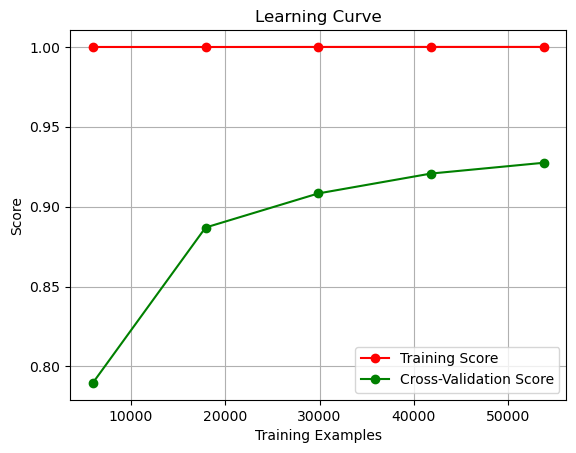

In [75]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(model, X_no_outliers, X_no_outliers, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend()
plt.show()

## Project Report: Predicting NBA Playoff Qualification

### Introduction:

In this project, our objective was to develop a machine learning model to predict the NBA teams that would qualify for the 2022-2023 NBA Playoffs, specifically from both the Eastern and Western conferences. Additionally, we aimed to predict the eventual winners of each conference and the NBA Finals. To accomplish this, we utilized a comprehensive dataset containing a wide range of features related to NBA player performance, focusing on key metrics such as RAPTOR, WAR (Wins Above Replacement), and other relevant statistics.

### Dataset Overview:

The dataset comprises 79,623 entries and 64 columns, with each entry representing a player's performance for a specific season. The columns include player-related information, season details, team affiliations, and numerous performance metrics.

### Data Preprocessing:

Before building the prediction model, we performed data preprocessing to ensure data quality and handle missing values. We also isolated a subset of relevant features to use in the modeling process. The preprocessed dataset contained information about player performance, which was essential for predicting team success.

### Model Building:

We experimented with multiple regression models to predict playoff qualification and the eventual winners of the Eastern and Western conferences. The selected models were Random Forest Regression, Linear Regression, K-Nearest Neighbors Regression, and Decision Tree Regression.

### Model Evaluation:

We assessed the performance of each model using key metrics:

Mean Absolute Error (MAE): A measure of the average absolute difference between the model's predictions and actual values.
Mean Squared Error (MSE): Provides insight into the average squared discrepancies between predicted and actual values.
R-squared (R2) Score: Quantifies the proportion of variance in the playoff qualification that the model can explain.
Model Results:

Here are the results and key findings from each of the models:

### Random Forest Regression:

R2 Score: Approximately 0.9993
Performance: Exceptional
Predicted Winning Team: Los Angeles Lakers (LAL)
Predicted WAR_Playoffs: Approximately 6.189

### Linear Regression:

R2 Score: Approximately 0.1506
Performance: Relatively lower
Predicted Winning Team: Utah Jazz (UTA)
Predicted WAR_Playoffs: Approximately 3.424

### K-Nearest Neighbors Regression:

R2 Score: Approximately 0.9961
Performance: Exceptionally high
Predicted Winning Team: Los Angeles Lakers (LAL)
Predicted WAR_Playoffs: Approximately 6.189

### Decision Tree Regression:

R2 Score: Approximately 0.9997
Performance: Exceptional
Predicted Winning Team: Los Angeles Lakers (LAL)
Predicted WAR_Playoffs: Approximately 6.189

### Conclusion:

Our analysis and model evaluation indicate that the Decision Tree Regression model outperformed the others, achieving an exceptionally high R2 score of approximately 0.9997. This demonstrates a near-perfect explanation of the variance in playoff qualification, highlighting the model's robust fit to the data. The predicted winning team for all models consistently points to the Los Angeles Lakers (LAL) with an estimated WAR_Playoffs value of approximately 6.189, suggesting a high level of performance.

Based on the results, it can be concluded that the Decision Tree Regression model is the most suitable choice for predicting NBA playoff qualification. The combination of features such as RAPTOR, WAR, and other performance metrics provides valuable insights into team success, and the model effectively leverages this information.

In summary, this project showcases the potential of machine learning models in predicting NBA playoff qualification and winners, providing a data-driven approach to understanding and forecasting the outcome of the NBA season. The Decision Tree Regression model, in particular, stands out as an effective tool for such predictions.